### Generate Perceptron Method

In [23]:
import numpy as np

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    
    def fit(self, X, y):
        print('Fit method has called!')
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        
        print('First for loop start!')
        for i in range(self.n_iter):
            errors = 0
            print('n_iter : {}'.format(i))
            j = 0
            for xi, target in zip(X, y):
                print('{} th inner loop'.format(j))
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                print('update : {} / self.w_ : {} / errors : {}'.format(update, self.w_, errors))
                j += 1
                print()
            self.errors_.append(errors)
            print('self.errors_ : {}'.format(self.errors_))
        return self
    
    
    def net_input(self, X):
        # 최종 입력 계산 
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    
    def predict(self, X):
        # 단위 계단 함수를 사용해서 클래스 레이블을 반환
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


Bad key "text.kerning_factor" on line 4 in
/home/moon23k/anaconda3/envs/Basic_conda_env/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [5]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [6]:
y.shape

(100,)

In [8]:
X = df.iloc[0:100, [0,2]].values

In [9]:
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [14]:
df[4][:50].value_counts()

Iris-setosa    50
Name: 4, dtype: int64

In [15]:
df[4][50:].value_counts()

Iris-virginica     50
Iris-versicolor    50
Name: 4, dtype: int64

In [16]:
df[4][50:100].value_counts()

Iris-versicolor    50
Name: 4, dtype: int64

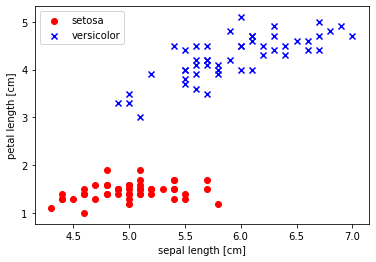

In [17]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')

plt.legend(loc='upper left')
plt.show()

#### 붓꽃 데이터에셋에서 추출한 일부 데이터에서 퍼셉트론 알고리즘을 학습

Fit method has called!
First for loop start!
n_iter : 0
0 th inner loop
update : 0.0 / self.w_ : [ 0.01624345 -0.00611756 -0.00528172] / errors : 0

1 th inner loop
update : 0.0 / self.w_ : [ 0.01624345 -0.00611756 -0.00528172] / errors : 0

2 th inner loop
update : 0.0 / self.w_ : [ 0.01624345 -0.00611756 -0.00528172] / errors : 0

3 th inner loop
update : 0.0 / self.w_ : [ 0.01624345 -0.00611756 -0.00528172] / errors : 0

4 th inner loop
update : 0.0 / self.w_ : [ 0.01624345 -0.00611756 -0.00528172] / errors : 0

5 th inner loop
update : 0.0 / self.w_ : [ 0.01624345 -0.00611756 -0.00528172] / errors : 0

6 th inner loop
update : 0.0 / self.w_ : [ 0.01624345 -0.00611756 -0.00528172] / errors : 0

7 th inner loop
update : 0.0 / self.w_ : [ 0.01624345 -0.00611756 -0.00528172] / errors : 0

8 th inner loop
update : 0.0 / self.w_ : [ 0.01624345 -0.00611756 -0.00528172] / errors : 0

9 th inner loop
update : 0.0 / self.w_ : [ 0.01624345 -0.00611756 -0.00528172] / errors : 0

10 th inner lo

update : 0.0 / self.w_ : [-0.38375655 -0.70611756  1.83471828] / errors : 0

13 th inner loop
update : 0.0 / self.w_ : [-0.38375655 -0.70611756  1.83471828] / errors : 0

14 th inner loop
update : 0.0 / self.w_ : [-0.38375655 -0.70611756  1.83471828] / errors : 0

15 th inner loop
update : 0.0 / self.w_ : [-0.38375655 -0.70611756  1.83471828] / errors : 0

16 th inner loop
update : 0.0 / self.w_ : [-0.38375655 -0.70611756  1.83471828] / errors : 0

17 th inner loop
update : 0.0 / self.w_ : [-0.38375655 -0.70611756  1.83471828] / errors : 0

18 th inner loop
update : 0.0 / self.w_ : [-0.38375655 -0.70611756  1.83471828] / errors : 0

19 th inner loop
update : 0.0 / self.w_ : [-0.38375655 -0.70611756  1.83471828] / errors : 0

20 th inner loop
update : 0.0 / self.w_ : [-0.38375655 -0.70611756  1.83471828] / errors : 0

21 th inner loop
update : 0.0 / self.w_ : [-0.38375655 -0.70611756  1.83471828] / errors : 0

22 th inner loop
update : 0.0 / self.w_ : [-0.38375655 -0.70611756  1.8347182

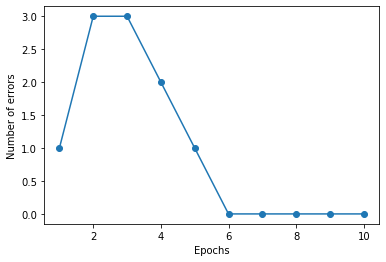

In [24]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')
plt.show()

In [28]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.2):
    
    # 마커와 컬러맵 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    
    # 결정 경계 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    
    # 샘플의 산점도 그리기
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl, 0],
                   y = X[y==cl, 1],
                   alpha = 0.8, 
                   c = colors[idx], 
                   label = cl,
                   edgecolor = 'black')

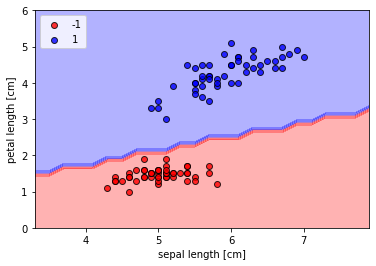

In [29]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()